In [160]:
import quandl
df = quandl.get("CHRIS/CME_ES2")
df.head()
df.tail()
df.shape

(5986, 8)

In [161]:
import talib as ta
df['EMA10'] = ta.EMA(df['Settle'].values, timeperiod=10)
df['EMA30'] = ta.EMA(df['Settle'].values, timeperiod=30)
df['ATR'] = ta.ATR(df['High'].values, df['Low'].values, df['Settle'].values, timeperiod=14)
df['ADX'] = ta.ADX(df['High'].values, df['Low'].values, df['Settle'].values, timeperiod=14)
df['RSI'] = ta.RSI(df['Settle'].values, timeperiod=14)
macd, macdsignal, macdhist = ta.MACD(df['Settle'].values, fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACDsignal'] = macdsignal
df.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,EMA10,EMA30,ATR,ADX,RSI,MACD,MACDsignal
Date,,,,,,,,,,,,,,,
2021-03-15,3937.50,3960.25,3913.00,3956.75,25.50,3958.25,1962578.0,1074588.0,3888.845380,3854.728033,67.948613,15.367395,61.385366,22.341798,13.495622
2021-03-16,3957.75,3970.75,3942.75,3957.50,-5.75,3952.50,1963102.0,1872176.0,3900.418947,3861.035901,65.095140,14.628503,60.581439,26.192142,16.034926
2021-03-17,3957.25,3973.50,3925.00,3961.25,11.00,3963.50,1922176.0,2334286.0,3911.888230,3867.646488,63.909773,13.605031,61.617057,29.787800,18.785501
2021-03-18,3962.00,3978.50,3900.50,3910.50,-57.50,3906.00,2096466.0,2499994.0,3910.817642,3870.120909,64.916218,13.153586,53.678224,27.678555,20.564112
2021-03-19,3910.75,3923.50,3875.00,3896.75,-6.25,3899.75,1986486.0,2556702.0,3908.805344,3872.032463,63.743631,13.216574,52.880689,25.212012,21.493692


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5986 entries, 1997-09-09 to 2021-03-19
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Open                        5986 non-null   float64
 1   High                        5986 non-null   float64
 2   Low                         5986 non-null   float64
 3   Last                        5986 non-null   float64
 4   Change                      1775 non-null   float64
 5   Settle                      5986 non-null   float64
 6   Volume                      5986 non-null   float64
 7   Previous Day Open Interest  5986 non-null   float64
 8   EMA10                       5977 non-null   float64
 9   EMA30                       5957 non-null   float64
 10  ATR                         5972 non-null   float64
 11  ADX                         5959 non-null   float64
 12  RSI                         5972 non-null   float64
 13  MACD           

In [163]:
import numpy as np
df['ClgtEMA10'] = np.where(df['Settle'] > df['EMA10'], 1, -1)
df['EMA10gtEMA30'] = np.where(df['EMA10'] > df['EMA30'], 1, -1)
df['MACDSIGgtMACD'] = np.where(df['MACDsignal'] > df['MACD'], 1, -1)
df.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,EMA10,EMA30,ATR,ADX,RSI,MACD,MACDsignal,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD
Date,,,,,,,,,,,,,,,,,,
2021-03-15,3937.50,3960.25,3913.00,3956.75,25.50,3958.25,1962578.0,1074588.0,3888.845380,3854.728033,67.948613,15.367395,61.385366,22.341798,13.495622,1,1,-1
2021-03-16,3957.75,3970.75,3942.75,3957.50,-5.75,3952.50,1963102.0,1872176.0,3900.418947,3861.035901,65.095140,14.628503,60.581439,26.192142,16.034926,1,1,-1
2021-03-17,3957.25,3973.50,3925.00,3961.25,11.00,3963.50,1922176.0,2334286.0,3911.888230,3867.646488,63.909773,13.605031,61.617057,29.787800,18.785501,1,1,-1
2021-03-18,3962.00,3978.50,3900.50,3910.50,-57.50,3906.00,2096466.0,2499994.0,3910.817642,3870.120909,64.916218,13.153586,53.678224,27.678555,20.564112,-1,1,-1
2021-03-19,3910.75,3923.50,3875.00,3896.75,-6.25,3899.75,1986486.0,2556702.0,3908.805344,3872.032463,63.743631,13.216574,52.880689,25.212012,21.493692,-1,1,-1


In [164]:
df['Return'] = df['Settle'].pct_change(1).shift(-1)
df['target_cls'] = np.where(df.Return > 0, 1, 0)
df['target_rgs'] = df['Return']
df.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,EMA10,EMA30,...,ADX,RSI,MACD,MACDsignal,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD,Return,target_cls,target_rgs
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-15,3937.50,3960.25,3913.00,3956.75,25.50,3958.25,1962578.0,1074588.0,3888.845380,3854.728033,...,15.367395,61.385366,22.341798,13.495622,1,1,-1,-0.001453,0,-0.001453
2021-03-16,3957.75,3970.75,3942.75,3957.50,-5.75,3952.50,1963102.0,1872176.0,3900.418947,3861.035901,...,14.628503,60.581439,26.192142,16.034926,1,1,-1,0.002783,1,0.002783
2021-03-17,3957.25,3973.50,3925.00,3961.25,11.00,3963.50,1922176.0,2334286.0,3911.888230,3867.646488,...,13.605031,61.617057,29.787800,18.785501,1,1,-1,-0.014507,0,-0.014507
2021-03-18,3962.00,3978.50,3900.50,3910.50,-57.50,3906.00,2096466.0,2499994.0,3910.817642,3870.120909,...,13.153586,53.678224,27.678555,20.564112,-1,1,-1,-0.001600,0,-0.001600
2021-03-19,3910.75,3923.50,3875.00,3896.75,-6.25,3899.75,1986486.0,2556702.0,3908.805344,3872.032463,...,13.216574,52.880689,25.212012,21.493692,-1,1,-1,NaN,0,NaN


In [165]:
df1=df.iloc[5806:5906,:]

In [166]:
predictors_list = ['ATR', 'ADX','RSI', 'ClgtEMA10', 'EMA10gtEMA30', 'MACDSIGgtMACD']
X = df1[predictors_list]
X.tail()

,ATR,ADX,RSI,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD
Date,,,,,,
2020-11-16,74.090807,25.102841,67.075196,1,1,-1
2020-11-17,71.941463,25.763853,64.948620,1,1,-1
2020-11-18,71.534930,25.823450,59.528632,1,1,-1
2020-11-19,69.282435,25.591419,60.787218,1,1,-1
2020-11-20,67.190833,25.365461,57.452127,1,1,-1


In [167]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2020-07-02 to 2020-11-20
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Open                        100 non-null    float64
 1   High                        100 non-null    float64
 2   Low                         100 non-null    float64
 3   Last                        100 non-null    float64
 4   Change                      100 non-null    float64
 5   Settle                      100 non-null    float64
 6   Volume                      100 non-null    float64
 7   Previous Day Open Interest  100 non-null    float64
 8   EMA10                       100 non-null    float64
 9   EMA30                       100 non-null    float64
 10  ATR                         100 non-null    float64
 11  ADX                         100 non-null    float64
 12  RSI                         100 non-null    float64
 13  MACD            

In [168]:
y_cls = df1.target_cls
y_cls.tail()

Date
2020-11-16    0
2020-11-17    0
2020-11-18    1
2020-11-19    0
2020-11-20    1
Name: target_cls, dtype: int32

In [169]:
y_rgs = df1.target_rgs
y_rgs.tail()

Date
2020-11-16   -0.004358
2020-11-17   -0.011672
2020-11-18    0.004218
2020-11-19   -0.007280
2020-11-20    0.006205
Name: target_rgs, dtype: float64

In [170]:
from sklearn.model_selection import train_test_split
y=y_cls
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X, y, test_size=0.3, random_state=432, stratify=y)

print (X_cls_train.shape, y_cls_train.shape)
print (X_cls_test.shape, y_cls_test.shape)

(70, 6) (70,)
(30, 6) (30,)


In [171]:
train_length = int(len(df)*0.70)
X_rgs_train = X[:train_length]
X_rgs_test = X[train_length:]
y_rgs_train = y_rgs[:train_length]
y_rgs_test = y_rgs[train_length:]

print (X_rgs_train.shape, y_rgs_train.shape)
print (X_rgs_test.shape, y_rgs_test.shape)

(100, 6) (100,)
(0, 6) (0,)


In [172]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=6)
clf

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

In [173]:
clf = clf.fit(X_cls_train, y_cls_train)
clf

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

[Text(0.5416666666666666, 0.875, 'RSI <= 57.998\ngini = 0.485\nsamples = 70\nvalue = [29, 41]'),
 Text(0.3333333333333333, 0.625, 'ADX <= 27.516\ngini = 0.422\nsamples = 33\nvalue = [10, 23]'),
 Text(0.16666666666666666, 0.375, 'ATR <= 63.728\ngini = 0.208\nsamples = 17\nvalue = [2, 15]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.5, 0.375, 'ATR <= 69.185\ngini = 0.5\nsamples = 16\nvalue = [8, 8]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.75, 0.625, 'RSI <= 59.384\ngini = 0.5\nsamples = 37\nvalue = [19, 18]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.8333333333333334, 0.375, 'RSI <= 64.455\ngini = 0.495\nsamples = 31\nvalue = [14, 17]'),
 Text(0.75, 0.125, 'gini = 0.408\nsamples = 14\nvalue = [4, 10]'),
 Tex

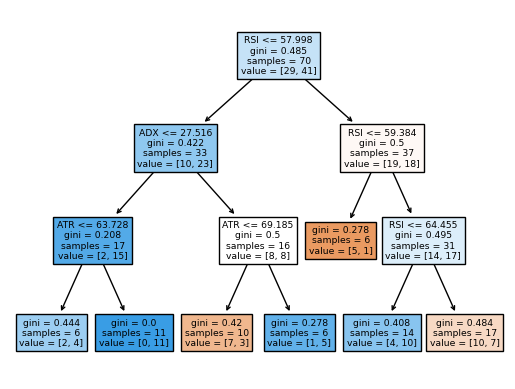

In [180]:
from sklearn import tree
import graphviz
tree.plot_tree(clf,filled=True,feature_names=predictors_list)


In [181]:
y_cls_pred = clf.predict(X_cls_test)

In [190]:
y_cls

Date
2020-07-02    1
2020-07-06    0
2020-07-07    1
2020-07-08    0
2020-07-09    1
             ..
2020-11-16    0
2020-11-17    0
2020-11-18    1
2020-11-19    0
2020-11-20    1
Name: target_cls, Length: 100, dtype: int32

In [182]:
from sklearn.metrics import classification_report
report = classification_report(y_cls_test, y_cls_pred)
print(report)

              precision    recall  f1-score   support

           0       0.35      0.50      0.41        12
           1       0.54      0.39      0.45        18

    accuracy                           0.43        30
   macro avg       0.45      0.44      0.43        30
weighted avg       0.46      0.43      0.44        30



In [183]:
# Regression tree model
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_leaf = 200)

In [184]:
dtr.fit(X_rgs_train, y_rgs_train)

DecisionTreeRegressor(min_samples_leaf=200)

In [187]:
X_rgs_train

,ATR,ADX,RSI,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD
Date,,,,,,
2020-07-02,77.822095,12.126881,56.896460,1,1,1
2020-07-06,77.138374,12.189551,60.398468,1,1,1
2020-07-07,75.253491,12.391669,56.329496,1,1,1
2020-07-08,72.699670,12.424685,58.593155,1,1,-1
2020-07-09,72.149693,12.036989,55.993296,1,1,-1
...,...,...,...,...,...,...
2020-11-16,74.090807,25.102841,67.075196,1,1,-1
2020-11-17,71.941463,25.763853,64.948620,1,1,-1
2020-11-18,71.534930,25.823450,59.528632,1,1,-1


[Text(0.5, 0.5, 'squared_error = 0.0\nsamples = 100\nvalue = 0.001')]

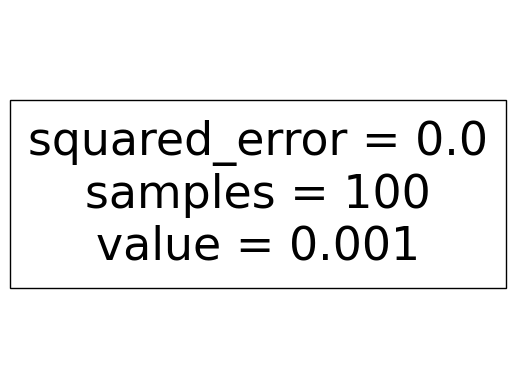

In [186]:
from sklearn import tree

tree.plot_tree(dtr,filled=True,feature_names=predictors_list)


In [194]:

from pathlib import Path
from collections import defaultdict
from time import time

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from logbook import Logger, StderrHandler, INFO

from zipline import run_algorithm
from zipline.api import (attach_pipeline, pipeline_output,
                         date_rules, time_rules, record,
                         schedule_function, commission, slippage,
                         set_slippage, set_commission,
                         get_open_orders, cancel_order,
                         order_target, order_target_percent)
from zipline.data import bundles
from zipline.utils.run_algo import load_extensions
from zipline.pipeline import Pipeline, CustomFactor
from zipline.pipeline.data import Column, DataSet
from zipline.pipeline.domain import JP_EQUITIES
from zipline.pipeline.filters import StaticAssets
from zipline.pipeline.loaders.frame import DataFrameLoader

import pyfolio as pf
from pyfolio.plotting import plot_rolling_returns, plot_rolling_sharpe
from pyfolio.timeseries import forecast_cone_bootstrap

ModuleNotFoundError: No module named 'zipline'

In [ ]:
idx = pd.IndexSlice
sns.set_style('whitegrid')
np.random.seed(42)

In [ ]:
results_path = Path('results', 'return_predictions')
if not results_path.exists():
    results_path.mkdir(parents=True)

In [ ]:
load_extensions(default=True,
                extensions=[],
                strict=True,
                environ=None)

In [ ]:
log_handler = StderrHandler(format_string='[{record.time:%Y-%m-%d %H:%M:%S.%f}]: ' +
                            '{record.level_name}: {record.func_name}: {record.message}',
                            level=INFO)
log_handler.push_application()
log = Logger('Algorithm')

In [ ]:
N_LONGS = 25
N_SHORTS = 25
MIN_POSITIONS = 15

In [ ]:
bundle_data = bundles.load('stooq')

In [ ]:

def load_predictions(bundle):
    t = 1
    df = pd.concat([pd.read_hdf(results_path / 'predictions.h5', 'train/{:02}'.format(t)),
                    pd.read_hdf(results_path / 'predictions.h5', 'test/{:02}'.format(t))])
    df = df[~df.index.duplicated()].drop('y_test', axis=1)
    predictions = df.iloc[:, :5].mean(1).to_frame('predictions')

    tickers = predictions.index.get_level_values('ticker').unique().tolist()

    assets = bundle.asset_finder.lookup_symbols(tickers, as_of_date=None)
    predicted_sids = pd.Int64Index([asset.sid for asset in assets])
    ticker_map = dict(zip(tickers, predicted_sids))

    return (predictions
            .unstack('ticker')
            .rename(columns=ticker_map)
            .predictions
            .tz_localize('UTC')), assets

In [ ]:
predictions, assets = load_predictions(bundle_data)

In [ ]:
predictions.info()

In [ ]:
class SignalData(DataSet):
    predictions = Column(dtype=float)
    domain = JP_EQUITIES

In [ ]:
signal_loader = {SignalData.predictions:
                 DataFrameLoader(SignalData.predictions, predictions)}

In [ ]:
class MLSignal(CustomFactor):
    """Converting signals to Factor
        so we can rank and filter in Pipeline"""
    inputs = [SignalData.predictions]
    window_length = 1

    def compute(self, today, assets, out, preds):
        out[:] = preds

In [ ]:
def compute_signals():
    signals = MLSignal()
    predictions = SignalData.predictions.latest
    return Pipeline(columns={
        'longs': signals.top(N_LONGS, mask=signals > 0),
        'shorts': signals.bottom(N_SHORTS, mask=signals < 0)},
        screen=StaticAssets(assets)
    )

In [ ]:
def initialize(context):
    """
    Called once at the start of the algorithm.
    """
    context.n_longs = N_LONGS
    context.n_shorts = N_SHORTS
    context.min_positions = MIN_POSITIONS
    context.universe = assets
    context.trades = pd.Series()

    set_slippage(slippage.FixedSlippage(spread=0.00))
    set_commission(commission.PerShare(cost=0.05, min_trade_cost=1))

    schedule_function(rebalance,
                      date_rules.every_day(),
                      time_rules.market_open(hours=1, minutes=30))

    schedule_function(record_vars,
                      date_rules.every_day(),
                      time_rules.market_close())

    pipeline = compute_signals()
    attach_pipeline(pipeline, 'signals')

In [ ]:
def before_trading_start(context, data):
    """
    Called every day before market open.
    """
    output = pipeline_output('signals')
    context.trades = (output['longs'].astype(int)
                      .append(output['shorts'].astype(int).mul(-1))
                      .reset_index()
                      .drop_duplicates()
                      .set_index('index')
                      .squeeze())

In [ ]:

def rebalance(context, data):
    """
    Execute orders according to schedule_function() date & time rules.
    """
    trades = defaultdict(list)
    for symbol, open_orders in get_open_orders().items():
        for open_order in open_orders:
            cancel_order(open_order)

    positions = context.portfolio.positions
    s = (pd.Series({s: v.amount*v.last_sale_price for s,
                    v in positions.items()})
         .sort_values(ascending=False))
    
    for stock, trade in context.trades.items():
        if trade == 0:
            order_target(stock, target=0)
        else:
            trades[trade].append(stock)

    context.longs, context.shorts = len(trades[1]), len(trades[-1])
    if context.longs > context.min_positions and context.shorts > context.min_positions:
        for stock in trades[-1]:
            order_target_percent(stock, -1 / context.shorts)
        for stock in trades[1]:
            order_target_percent(stock, 1 / context.longs)
    else:
        for stock in trades[-1] + trades[1]:
            if stock in positions:
                order_target(stock, 0)

In [ ]:
def record_vars(context, data):
    """
    Plot variables at the end of each day.
    """
    record(leverage=context.account.leverage,
           longs=context.longs,
           shorts=context.shorts)

In [ ]:
dates = predictions.index.get_level_values('date')
start_date = dates.min() + pd.DateOffset(day=1)
end_date = dates.max()

In [ ]:
print('Start:\t{}\nEnd:\t{}'.format(start_date.date(), end_date.date()))

In [ ]:
start = time()
results = run_algorithm(start=start_date,
                        end=end_date,
                        initialize=initialize,
                        before_trading_start=before_trading_start,
                        capital_base=1e6,
                        data_frequency='daily',
                        bundle='stooq',
                        custom_loader=signal_loader)# need to modify zipline

print('Duration: {:.2f}s'.format(time() - start))

In [ ]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)


In [ ]:
benchmark = web.DataReader('NIKKEI225', 
                           'fred', 
                           start='2015', 
                           end='2020').squeeze()
benchmark = benchmark.pct_change().tz_localize('UTC')

In [ ]:

fig, axes = plt.subplots(ncols=2, figsize=(16, 5))
plot_rolling_returns(returns,
                     factor_returns=benchmark,
                     live_start_date='2018-01-01',
                     logy=False,
                     cone_std=2,
                     legend_loc='best',
                     volatility_match=False,
                     cone_function=forecast_cone_bootstrap,
                    ax=axes[0])
plot_rolling_sharpe(returns, ax=axes[1], rolling_window=63)
axes[0].set_title('Cumulative Returns - In and Out-of-Sample')
axes[1].set_title('Rolling Sharpe Ratio (3 Months)')
fig.tight_layout()
fig.savefig((results_path / 'pyfolio_out_of_sample').as_posix(), dpi=300);

In [ ]:

pf.create_full_tear_sheet(returns, 
                          positions=positions, 
                          transactions=transactions,
                          benchmark_rets=benchmark,
                          live_start_date='2018-01-01', 
                          round_trips=True)